Following are a list of questions to be solved on a jupyter notebook and submitted back on this email. PFA the loandata.json for this.
1. Find % of total applicants for each unique value of dependents.
2. Find the average number of dependents per applicant.
3. Find the % of applications approved for self-employed applicants.
4. What is the % of rejections for married male applicants?
5. Which property area has the maximum approval ratio.
6. Find average dependents per income group.
7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_json("loan_data.json")

In [3]:
df.shape

(511, 10)

In [4]:
df.sample(5)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
165,LP001665,Male,Yes,1,Graduate,No,1,Semiurban,low,N
215,LP001843,Male,Yes,1,Not Graduate,No,1,Semiurban,low,Y
450,LP002741,Female,Yes,1,Graduate,No,1,Semiurban,medium,Y
220,LP001859,Male,Yes,0,Graduate,No,1,Rural,high,N
154,LP001636,Male,Yes,0,Graduate,No,1,Semiurban,medium,Y


In [5]:
df.isnull().sum()

Application_ID        0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Income                0
Application_Status    0
dtype: int64

In [6]:
df.describe()

,Credit_History
count,511.000000
mean,0.843444
std,0.363738
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


#### --------------------------------------------------------------------------------------------------------------------

#  1. Find % of total applicants for each unique value of deendents.

<AxesSubplot:ylabel='Dependents'>

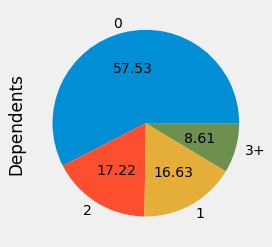

In [7]:
df["Dependents"].value_counts().plot(kind="pie",autopct="%.02f")

In [8]:
# What is the % of rejections for married male applicants?

In [9]:
marriend = df.groupby("Married")

In [10]:
df.groupby("Married")["Gender"].count().sort_values(ascending=False)

Married
Yes    331
No     180
Name: Gender, dtype: int64

##### --------------------------------------------------------------------------------------------------------------------------------------

# 2.Find the average number of dependents per applicant.

In [11]:
dep = df.groupby("Dependents")

In [12]:
dep.get_group("0").mean()[0]

0.0

In [13]:
dep.get_group("1").mean()[0]

1.30718954248366e+82

In [14]:
dep.get_group("2").mean()[0]

2.5252525252525254e+85

In [15]:
dep.get_group("3+").mean()[0]

0.75

#### -------------------------------------------------------------------------------------------------------------------------------------

# 3.Find the % of applications approved for self-employed applicants.

<AxesSubplot:ylabel='Application_Status'>

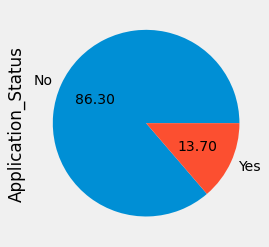

In [16]:
df.groupby("Self_Employed")["Application_Status"].count().plot(kind="pie",autopct="%.2f")

# 4. What is the % of rejections for married male applicants?

In [17]:
pd.crosstab(df["Married"],df["Gender"])

Gender,Female,Male
Married,,
No,66,114
Yes,25,306


In [18]:
pd.crosstab(df["Married"],df["Application_Status"])

Application_Status,N,Y
Married,,
No,69,111
Yes,95,236


In [19]:
male_maried = pd.crosstab(df["Married"],df["Gender"]).values[1][1]
male_maried

306

In [20]:
married_male_app = pd.crosstab(df["Married"],df["Application_Status"]).values[1][1]
married_male_app

236

In [21]:
married_male_rejection = male_maried -  married_male_app
married_male_rejection

70

In [22]:
rejection_marriend_male_app = (married_male_rejection/male_maried)*100
print("The % of rejections for married male applicants is : ",rejection_marriend_male_app)

The % of rejections for married male applicants is :  22.875816993464053


# 5.Which property area has the maximum approval ratio.

In [23]:
df.head(5)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [24]:
df.groupby("Property_Area")["Application_Status"].count()

Property_Area
Rural        149
Semiurban    197
Urban        165
Name: Application_Status, dtype: int64

<AxesSubplot:ylabel='Application_Status'>

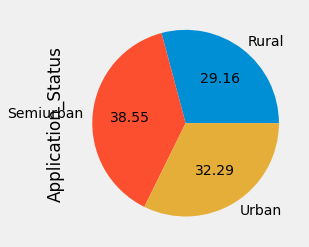

In [25]:
df.groupby("Property_Area")["Application_Status"].count().plot(kind="pie",autopct="%.2f")

# 6.Find average dependents per income group.

In [26]:
# 6.Find average dependents per income group.
# ANS
pd.crosstab(df["Dependents"],df["Income"]).mean()

Income
high      11.25
low       68.25
medium    48.25
dtype: float64

<AxesSubplot:xlabel='Income'>

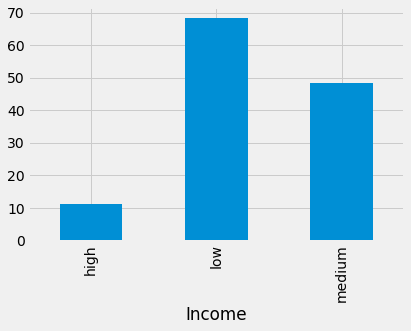

In [27]:
pd.crosstab(df["Dependents"],df["Income"]).mean().plot(kind="bar")

# Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score.

In [28]:
df.sample(5)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
127,LP001528,Male,No,0,Graduate,No,0,Rural,medium,N
309,LP002194,Female,No,0,Graduate,Yes,1,Semiurban,high,Y
181,LP001713,Male,Yes,1,Graduate,Yes,1,Urban,medium,Y
51,LP001199,Male,Yes,2,Not Graduate,No,1,Urban,low,Y
163,LP001658,Male,No,0,Graduate,No,1,Semiurban,low,Y


In [29]:
#X = df.iloc[:,1:9]
#y= df.iloc[:,-1]

In [30]:
X = df[["Gender","Married","Education","Self_Employed","Credit_History","Property_Area","Income"]]
y= df.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Income
208,Male,Yes,Graduate,No,1,Urban,medium
204,Male,No,Graduate,No,1,Urban,low
301,Male,Yes,Graduate,No,1,Semiurban,medium
390,Male,Yes,Not Graduate,No,0,Urban,low
416,Male,No,Graduate,No,0,Rural,medium
...,...,...,...,...,...,...,...
106,Male,No,Graduate,No,1,Rural,low
270,Male,Yes,Graduate,No,1,Semiurban,low
348,Female,No,Graduate,No,1,Urban,low
435,Male,Yes,Graduate,Yes,1,Rural,medium


In [34]:
df["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
506     0
507    3+
508     1
509     2
510     0
Name: Dependents, Length: 511, dtype: object

In [35]:
# Dealing with Categorical Variable.
tnf1 = ColumnTransformer(transformers=[
    ("ohe",OneHotEncoder(sparse=False,
                                     drop="first"),[0,1,2,3,5,6])
],remainder="passthrough")

In [36]:
tnf2 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,10))
]) 

In [37]:
# Model Selection
tnf3 = RandomForestClassifier()

In [38]:
# tnf3 = DecisionTreeClassifier()
# tnf3 = LogisticRegression()

In [39]:
pipe = Pipeline([
    ("tnf1",tnf1),
    ("tnf2",tnf2),
    ("tnf3",tnf3)
])

In [40]:
from sklearn import set_config
set_config(display="diagram")

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tnf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 5, 6])])),
                ('tnf2',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('tnf3', RandomForestClassifier())])

In [42]:
y_pred = pipe.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.7766990291262136


In [ ]:
df.drop_duplicates()